# Zyfra Gold Mining
Prepare a prototype of a machine learning model for Zyfra. The company develops efficiency solutions for heavy industry.
The model should predict the amount of gold recovered from gold ore. You have the data on extraction and purification.
The model will help to optimize the production and eliminate unprofitable parameters.

### Goal:
Create a model to successfully predict two values: rougher concentrate recovery and final concentrate recovery. Calculate an acceptable sMAPE (symmetric Mean Absolute Percentage Error).

### Stages 
Our project will consist of five stages:
 1. Initialization
 2. Preparing the Data
 3. Analyzing the Data
 4. Building the Model
 5. Conclusion

## Initialization
We will first begin by loading all necessary libraries, and reading in our data sets.

In [1]:
import pandas as pd# Loading all the libraries
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from numpy import mean
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor

In [2]:
import warnings
warnings.filterwarnings("ignore")

### Loading in the data

In [3]:
try:
    train = pd.read_csv('/datasets/gold_recovery_train.csv') # reading in data with try-except clause
    test = pd.read_csv('/datasets/gold_recovery_test.csv')
    data = pd.read_csv('/datasets/gold_recovery_full.csv')
except:
    print('File not found.')

## Preparing the Data
Now that we have read in the data, we will take a closer look at what each set contains. We will ensure that our columns are appropriate types and that there are no missing or duplicated values that will affect our model creation.

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

In [5]:
print(train.isna().sum())

date                                            0
final.output.concentrate_ag                    72
final.output.concentrate_pb                    72
final.output.concentrate_sol                  370
final.output.concentrate_au                    71
                                             ... 
secondary_cleaner.state.floatbank5_a_level     85
secondary_cleaner.state.floatbank5_b_air       85
secondary_cleaner.state.floatbank5_b_level     84
secondary_cleaner.state.floatbank6_a_air      103
secondary_cleaner.state.floatbank6_a_level     85
Length: 87, dtype: int64


In [6]:
train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.in

In [8]:
test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [9]:
print(test.isna().sum())

date                                            0
primary_cleaner.input.sulfate                 302
primary_cleaner.input.depressant              284
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                166
primary_cleaner.state.floatbank8_a_air         16
primary_cleaner.state.floatbank8_a_level       16
primary_cleaner.state.floatbank8_b_air         16
primary_cleaner.state.floatbank8_b_level       16
primary_cleaner.state.floatbank8_c_air         16
primary_cleaner.state.floatbank8_c_level       16
primary_cleaner.state.floatbank8_d_air         16
primary_cleaner.state.floatbank8_d_level       16
rougher.input.feed_ag                          16
rougher.input.feed_pb                          16
rougher.input.feed_rate                        40
rougher.input.feed_size                        22
rougher.input.feed_sol                         67
rougher.input.feed_au                          16
rougher.input.floatbank10_sulfate             257


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null object
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant             

In [11]:
data.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


Overall, we can see that there are some issues. There are missing values, which are not able to be handled by our model. In addition, our train and test sets have a different number of features which will present issues as well in our future calculations. We will address these issues in our preprocessing section, but first we will ensure our recovery calculation column is calculated correctly.

### Recovery Calculation
Now we will check that recovery is calculated correctly. Using the training set, we calculate recovery for the rougher.output.recovery feature. Then we find the MAE between our calculations and the feature values. For the purposes of comparison, we will drop the missing values in that column for comparison.

In [12]:
train_set = train.dropna(subset = ['rougher.output.recovery']) # dropping missing values

In [13]:
train_set = train_set.reset_index(drop=True) # resetting index

In [14]:
def recovery(C,F,T): #defining function for recovery calculation 
    recovery = (C*(F-T))/(F*(C-T))*100
    return recovery

In [15]:
#calling the function
recovery_rougher = recovery(train_set['rougher.output.concentrate_au'], train_set['rougher.input.feed_au'], train_set['rougher.output.tail_au'])

In [16]:
recovery_train = train['rougher.output.recovery'].dropna() #dropping our missing values

In [17]:
recovery_train = recovery_train.reset_index(drop=True) #resetting index

In [18]:
mae_rough = mean_absolute_error(recovery_train, recovery_rougher) #calculating the mae

In [19]:
print(mae_rough)

9.444891926100695e-15


We can see that our MAE is very low. This confirms that the recovery is calculated correctly as the margin of error is so low. 

### Analyzing the differences between Testing/Training Data
Now we will examine closer the differences in features between our training and testing data.

In [20]:
train_columns = train.columns
test_columns = test.columns
for i in train_columns:
    if i not in test_columns:
        print(i)

final.output.concentrate_ag
final.output.concentrate_pb
final.output.concentrate_sol
final.output.concentrate_au
final.output.recovery
final.output.tail_ag
final.output.tail_pb
final.output.tail_sol
final.output.tail_au
primary_cleaner.output.concentrate_ag
primary_cleaner.output.concentrate_pb
primary_cleaner.output.concentrate_sol
primary_cleaner.output.concentrate_au
primary_cleaner.output.tail_ag
primary_cleaner.output.tail_pb
primary_cleaner.output.tail_sol
primary_cleaner.output.tail_au
rougher.calculation.sulfate_to_au_concentrate
rougher.calculation.floatbank10_sulfate_to_au_feed
rougher.calculation.floatbank11_sulfate_to_au_feed
rougher.calculation.au_pb_ratio
rougher.output.concentrate_ag
rougher.output.concentrate_pb
rougher.output.concentrate_sol
rougher.output.concentrate_au
rougher.output.recovery
rougher.output.tail_ag
rougher.output.tail_pb
rougher.output.tail_sol
rougher.output.tail_au
secondary_cleaner.output.tail_ag
secondary_cleaner.output.tail_pb
secondary_cleaner.

We can see that there are several points missing from our test data set. Most of these are the final outputs, calculated columns and tails. Since these are values that are found later in the recovery process, our model will seek to predict the outcome prior to these measurements being taken.

### Preprocessing

In this section we will make our data ready for processing. First, we will remove all our missing values, then we will remove the columns from our training set that are not present in our test set.

In [21]:
ttrain = train.dropna()

In [22]:
#creating features for train set
features_train = ttrain[['primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air',
       'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_c_air',
       'rougher.state.floatbank10_c_level', 'rougher.state.floatbank10_d_air',
       'rougher.state.floatbank10_d_level', 'rougher.state.floatbank10_e_air',
       'rougher.state.floatbank10_e_level', 'rougher.state.floatbank10_f_air',
       'rougher.state.floatbank10_f_level',
       'secondary_cleaner.state.floatbank2_a_air',
       'secondary_cleaner.state.floatbank2_a_level',
       'secondary_cleaner.state.floatbank2_b_air',
       'secondary_cleaner.state.floatbank2_b_level',
       'secondary_cleaner.state.floatbank3_a_air',
       'secondary_cleaner.state.floatbank3_a_level',
       'secondary_cleaner.state.floatbank3_b_air',
       'secondary_cleaner.state.floatbank3_b_level',
       'secondary_cleaner.state.floatbank4_a_air',
       'secondary_cleaner.state.floatbank4_a_level',
       'secondary_cleaner.state.floatbank4_b_air',
       'secondary_cleaner.state.floatbank4_b_level',
       'secondary_cleaner.state.floatbank5_a_air',
       'secondary_cleaner.state.floatbank5_a_level',
       'secondary_cleaner.state.floatbank5_b_air',
       'secondary_cleaner.state.floatbank5_b_level',
       'secondary_cleaner.state.floatbank6_a_air',
       'secondary_cleaner.state.floatbank6_a_level']]
target_train = ttrain[['rougher.output.recovery', 'final.output.recovery']] #creating target

In [23]:
ttest= test.dropna()

## Analyzing the data
Now we will move on to doing an analysis of our data, and examining it more closely. 

### Purification particulates
First we will note how the concentrations of metals (Au, Ag, Pb) change depending on the purification stage.

In [24]:
print(mean(data['rougher.input.feed_ag'])) #finding the averages for Ag
print(mean(data['rougher.output.concentrate_ag']))
print(mean(data['primary_cleaner.output.concentrate_ag']))
print(mean(data['final.output.concentrate_ag']))

8.065715344767641
10.874483745395448
7.69165176429709
4.781559451695084


In [25]:
print(mean(data['rougher.input.feed_au'])) # finding the averages for Au
print(mean(data['rougher.output.concentrate_au']))
print(mean(data['primary_cleaner.output.concentrate_au']))
print(mean(data['final.output.concentrate_au']))

7.565837755623329
17.879538203033484
29.2122887022116
40.001171896007136


In [26]:
print(mean(data['rougher.input.feed_pb'])) #finding the averages for Pb
print(mean(data['rougher.output.concentrate_pb']))
print(mean(data['primary_cleaner.output.concentrate_pb']))
print(mean(data['final.output.concentrate_pb']))

3.3056758107348885
6.900646225251443
8.921109840609049
9.095308105450266


We can see that the silver concentration (Ag) decrease with the purification procedure, which makes sense as we are seeking to keep the gold particles. Our gold concentration greatly increases with each step as expected. However, our lead concentration (Pb) did increase slightly with each step. Perhaps this means our procedures could be improved in our to better remove the lead from our outputs. 

### Particle Size Distribution
Now we will compare the feed particle size distributions in the training set and in the test set. If the distributions vary significantly, the model evaluation will be incorrect. We will do this graphically for better visualization

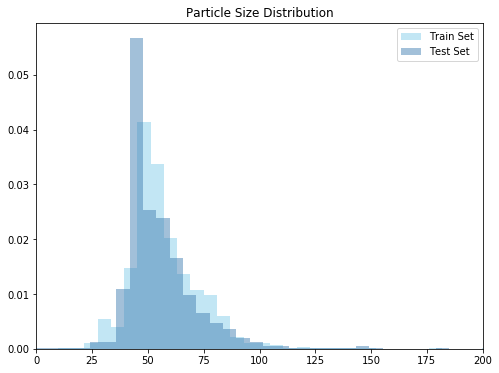

In [27]:
labels = ['Train Set', 'Test Set']
plt.figure(figsize = (8,6))
plt.hist(train['rougher.input.feed_size'], bins=80, color='skyblue', density=True, alpha=0.5)
plt.hist(test['rougher.input.feed_size'], bins=80, color='steelblue', density=True, alpha=0.5)
plt.title('Particle Size Distribution')
plt.legend(labels)
plt.xlim(0,200)
plt.show()

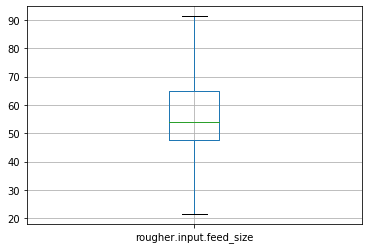

In [28]:
train.boxplot('rougher.input.feed_size', showfliers=False) #boxplot of training set

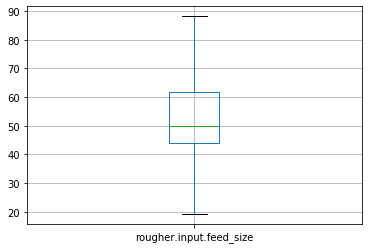

In [29]:
test.boxplot('rougher.input.feed_size', showfliers=False) #boxplot of testing set

We can see that overall the two have a relatively similar distribution. While our test data set is significantly smaller than that of our training dataset, they share similar distributions and averages. This is acceptable to continue our calculations.

### Total Concentrations of Substances

In [30]:
tc_input=[]
tc_rougher=[]
tc_primary_cleaner=[]
tc_final=[]
for i in range(0,len(train)):
    tc_input_i = train['rougher.input.feed_ag'][i] + train['rougher.input.feed_au'][i] + train['rougher.input.feed_pb'][i]
    tc_rougher_i = train['rougher.output.concentrate_ag'][i] + train['rougher.output.concentrate_au'][i] + train['rougher.output.concentrate_pb'][i]
    tc_primary_cleaner_i = train['primary_cleaner.output.concentrate_pb'][i] + train['primary_cleaner.output.concentrate_au'][i] + train['primary_cleaner.output.concentrate_ag'][i]
    tc_final_i = train['final.output.concentrate_pb'][i] + train['final.output.concentrate_pb'][i] + train['final.output.concentrate_pb'][i]
    tc_input.append(tc_input_i)
    tc_rougher.append(tc_rougher_i)
    tc_primary_cleaner.append(tc_primary_cleaner_i)
    tc_final.append(tc_final_i)

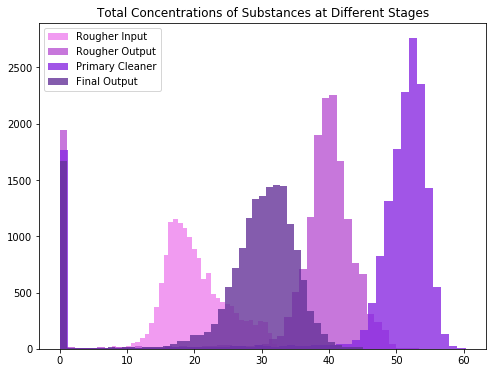

In [31]:
labels=['Rougher Input', 'Rougher Output', 'Primary Cleaner', 'Final Output']
plt.figure(figsize=(8,6))
plt.hist(tc_input, bins=50, color='violet', alpha=0.8)
plt.hist(tc_rougher, bins=50, color='mediumorchid', alpha=0.8)
plt.hist(tc_primary_cleaner, bins=50, color='blueviolet', alpha=0.8)
plt.hist(tc_final, bins=50, color='rebeccapurple', alpha=0.8)
plt.legend(labels)
plt.title('Total Concentrations of Substances at Different Stages')
plt.show()

Examining this graph we can see that, for the most part, the graph makes sense. It appears that the final output appears lower than that of other levels, but this is most likely due to the fact that the gold makes up the majority of what is left as the others decrease. However, there is an abnormality which is clearly noticeable. There is a large spike at the zero mark which is present at each level of concentration. This would mean that there would be 0% of any of the three metals we were examining. This anomaly would affect our data as it would insinuate that there is no gold in some of the processed samples. We will remove these from our data before building our model.

In [32]:
for index, row in train.iterrows(): #removing rows from our training data where the concentrations are 0
    if tc_input[index] <= 0:
        train.drop(index, inplace=True)
    elif tc_rougher[index] <= 0:
        train.drop(index, inplace=True)
    elif tc_primary_cleaner[index] <= 0:
        train.drop(index, inplace=True)
    elif tc_final[index] <= 0:
        train.drop(index, inplace=True)
train.reset_index(drop=True, inplace=True)

Now to ensure that these were removed appropriately, we will loop over our data and print the index of any which may have been missed.

In [33]:
for i in range(0,len(train)): #printing any indexes where concentrations are 0
    tc_input_i = train['rougher.input.feed_ag'][i] + train['rougher.input.feed_au'][i] + train['rougher.input.feed_pb'][i]
    tc_rougher_i = train['rougher.output.concentrate_ag'][i] + train['rougher.output.concentrate_au'][i] + train['rougher.output.concentrate_pb'][i]
    tc_primary_cleaner_i = train['primary_cleaner.output.concentrate_pb'][i] + train['primary_cleaner.output.concentrate_au'][i] + train['primary_cleaner.output.concentrate_ag'][i]
    tc_final_i = train['final.output.concentrate_pb'][i] + train['final.output.concentrate_pb'][i] + train['final.output.concentrate_pb'][i]
    if (tc_input_i == 0 or tc_rougher_i ==0) or (tc_primary_cleaner_i == 0 or tc_final_i ==0):
        print(i)

Since our loop did not print any indexes, we believe we have removed these anomalies and can move on to the creation of the model.

## Building the model
We will now move on to creating our model. We will start will creating our function for SMAPE. Then we will pick our best model and test it with our test sample.

### sMAPE Function
Write a function to calculate the final sMAPE value.

In [34]:
#Create function to calculate sMAPE.
def smape2(y_true, y_pred):
    smape = np.mean(abs(y_pred - y_true) / ((abs(y_true) + abs(y_pred)) / 2)) * 100 
    return smape

#Create function to calculate final sMAPE.
def f_smape(y_true, y_pred):
    predicted_rough, predicted_final = y_pred[:, 0], y_pred[:, 1]
    true_rough, true_final = y_true.iloc[:, 0], y_true.iloc[:, 1]
    f_smape = (.25 * (smape2(true_rough, predicted_rough))) + (.75 * (smape2(true_final, predicted_final)))
    return f_smape

In [35]:
smape2(recovery_train, recovery_rougher) #testing that our function works

1.1865277311376904e-14

### Training/Evaluating Models
Now we will choose the model best suited for our goals. We will score them using the cross validation score by utilizing our sMAPE score function, and choose the one that produces the lowest score.

In [36]:
smape_score= make_scorer(f_smape,greater_is_better=False) #creating our scoring object

In [37]:
model_tree = DecisionTreeRegressor(random_state=12345, max_depth=2)
scores = cross_val_score(estimator=model_tree,X= features_train, y=target_train, cv=5, scoring=smape_score)
final_score = (sum(scores)/ len(scores))
print('Average sMAPE Evaluation Score:', abs(final_score))
#model_tree.fit(features_train, target_train) 

Average sMAPE Evaluation Score: 9.256795905147513


In [38]:
model_lin = LinearRegression()
scores = cross_val_score(estimator=model_lin,X= features_train, y=target_train, cv=5, scoring=smape_score)
final_score = (sum(scores)/ len(scores))
print('Average sMAPE Evaluation Score:', abs(final_score))
#model_lin.fit(features_train, target_train)

Average sMAPE Evaluation Score: 10.290896728293244


In [39]:
model_forest = RandomForestRegressor(random_state = 12345, n_estimators =10)
scores = cross_val_score(estimator=model_forest,X= features_train, y=target_train, cv=5, scoring=smape_score)
final_score = (sum(scores)/ len(scores))
print('Average sMAPE Evaluation Score:', abs(final_score))

Average sMAPE Evaluation Score: 13.069135284332955


We can see that our Decision Tree Regressor had the best cross validation score utilizing our sMAPE function, so we will go on to fit this one with our training data.

In [40]:
model_tree.fit(features_train, target_train)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=12345, splitter='best')

### Predictions and Final sMAPE score
In this section we will take our model and apply it to our test data. To do this we will pull our true data from the full data set by joining it on the unique ID of the date. Then we will make our predictions based on the test set and use these to compare for a final score. Finally, we will compare this to a dummy model to ensure that we have created a better model

In [41]:
ttest.head() #looking at our test set

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [42]:
true_test = data.merge(ttest,on=['date'], how='right') #merging to our full data based on the unique date id

In [43]:
true_test.head() #ensuring data sets were merged appropriately on date

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air_y,secondary_cleaner.state.floatbank4_a_level_y,secondary_cleaner.state.floatbank4_b_air_y,secondary_cleaner.state.floatbank4_b_level_y,secondary_cleaner.state.floatbank5_a_air_y,secondary_cleaner.state.floatbank5_a_level_y,secondary_cleaner.state.floatbank5_b_air_y,secondary_cleaner.state.floatbank5_b_level_y,secondary_cleaner.state.floatbank6_a_air_y,secondary_cleaner.state.floatbank6_a_level_y
0,2016-09-01 00:59:59,7.578381,10.466295,11.990938,40.743891,70.273583,12.688885,3.844413,11.075686,4.537988,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,7.813838,10.581152,12.216172,39.604292,68.910432,12.829171,3.918901,11.132824,4.675117,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,7.623392,10.424024,12.313710,40.724190,68.143213,12.977846,4.026561,10.990134,4.828907,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,8.552457,10.503229,13.074570,39.290997,67.776393,12.451947,3.780702,11.155935,4.969620,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,8.078781,10.222788,12.475427,40.254524,61.467078,11.827846,3.632272,11.403663,5.256806,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [44]:
true_test_data = true_test[['rougher.output.recovery', 'final.output.recovery']] #pulling our two columns for comparing
true_test_data.head() #ensuring correct rows were kepy

,rougher.output.recovery,final.output.recovery
0,89.993421,70.273583
1,88.089657,68.910432
2,88.412756,68.143213
3,87.360133,67.776393
4,83.236367,61.467078


In [45]:
ttest= ttest.drop(columns=['date']) #dropping date column to feed this set into our model

In [46]:
predict_test = model_tree.predict(ttest) #finding our testing predictions

In [47]:
final_smape= f_smape(true_test_data, predict_test) #calculating our final smape score
print(final_smape)

9.759679053775073


Now that we have obtained our score for our test data, we will move on to creating our dummy model.

In [48]:
dummy_model = DummyRegressor(strategy='mean') #building a dummy model

In [49]:
dummy_model.fit(features_train, target_train) #fitting it to our set

DummyRegressor(constant=None, quantile=None, strategy='mean')

In [50]:
dummy_model_predictions = dummy_model.predict(ttest) #making predictions

In [51]:
dummy_smape = f_smape(true_test_data, dummy_model_predictions) #calculating dummy score
print(dummy_smape)

10.14804467562043


We can see that we have a final smape of about 9, which is acceptable although it is not a perfect score. In addition, we compared this to our dummy score and found that it is better, and therefore would move forward with accepting this score.

## Conclusion
In this project, we examined the Zyfra gold purification procedure. We examined each step of the process for purification and confirmed our distributions were relatively similar for both our training and testing sets. We found and removed anomalies with our data that would affect our future calculations. We confirmed that gold recovery was being calculated correctly. Then we created a good model by selecting the best of our regression models using cross validation and our custom sMAPE scoring. The DecisionTreeRegressor model was trained and fitted, then used to make predictions. In the end, we created functions which could be used to calculate our sMAPE score, and found that our model's was acceptable and better than our dummy model. 